In [2]:
import pandas as pd
import mglearn
import preamble
#순서. preamble이 나중이어야함

In [4]:
from preamble import *

## 결정트리와 랜덤포레스트

### 결정트리

- 장점 : 전처리 민감하지 않음 바로실행가능

- 단점 : 데이터에 민감함-> 과대적합에 취약 

- 언제? 주요특징 파악하고자 할 때 

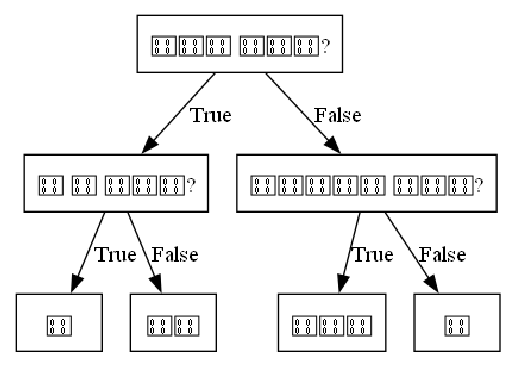

In [5]:
# TODO: 한국어 깨짐
mglearn.plots.plot_animal_tree()
#함수로 말아져 있기 때문에 반드시 mglearn폴더에 있는 함수임 수정필요시 거기 가서 해

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


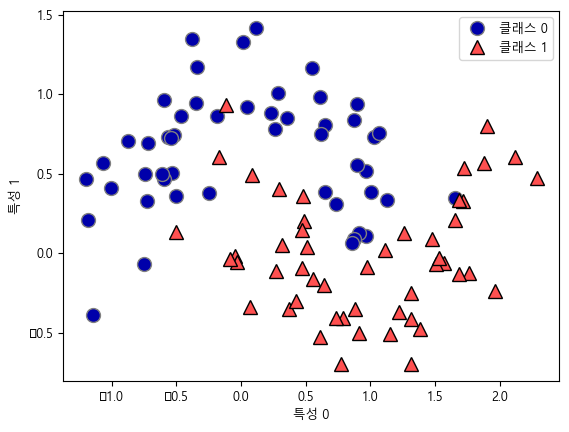

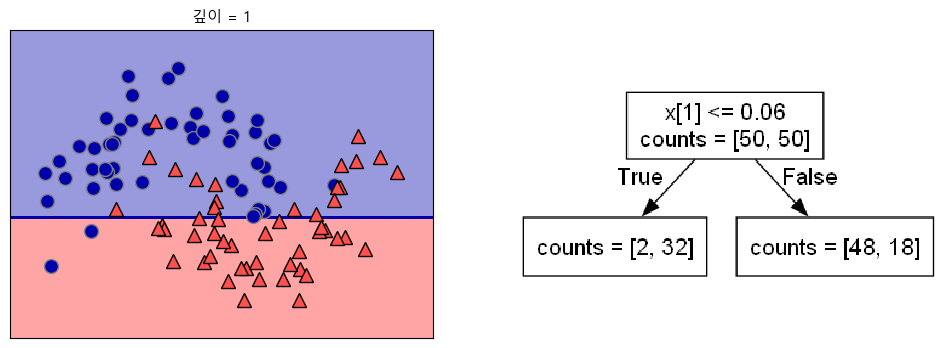

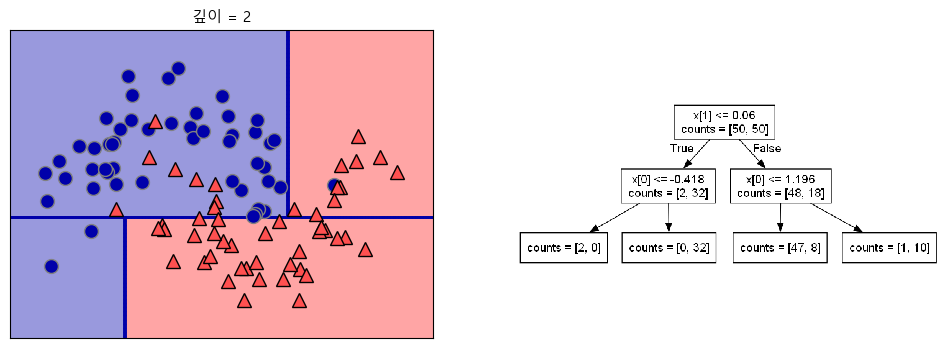

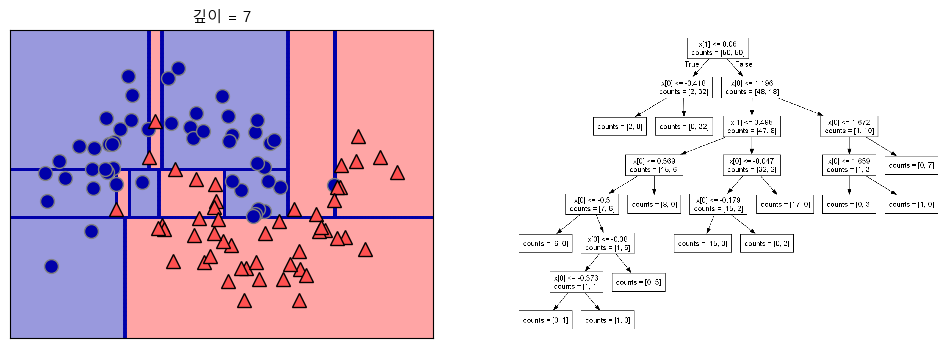

In [7]:
#결정트리 과정 시각적으로 보여줌 알고리즘 진행과정
mglearn.plots.plot_tree_progressive()

# 깊이가 2^7이면 128개인데 데이터셋은 100개인데 .. 필연적으로 과대적합됨

### 일반적 결정트리 학습과정

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#stratify를 사용하면 훈련 세트와 테스트 세트 모두에서 동일한 클래스 비율을 유지(train_test_split의 param)!
#전체 비율에서 랜덤샘플링할때 0과 1로 나눠진 target에서 0이 많다 1이 많다 하더라도 완전 randomly하게가 아니고 비율을 균질하게 맞춰서, 층을맞춰서 뽑아줌 

In [24]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
print(tree.score(X_train, y_train), tree.score(X_test, y_test))
#train은 1.0.. 과대적합

0.9882629107981221 0.9440559440559441


In [16]:
cancer["target"].shape

(569,)

In [17]:
cancer["data"].shape #30개의 데이터를 다 보고 타겟을 골랐구나->과대적합의 원인-> 트리의 꼬리노드를 안보도록 하겟어 -> 트리의 차수 조절 -> tree에 max_depth=4 추가. 

(569, 30)

In [26]:
#결정트리 시각화
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file="tree.dot",
                class_names=["악성","양성"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

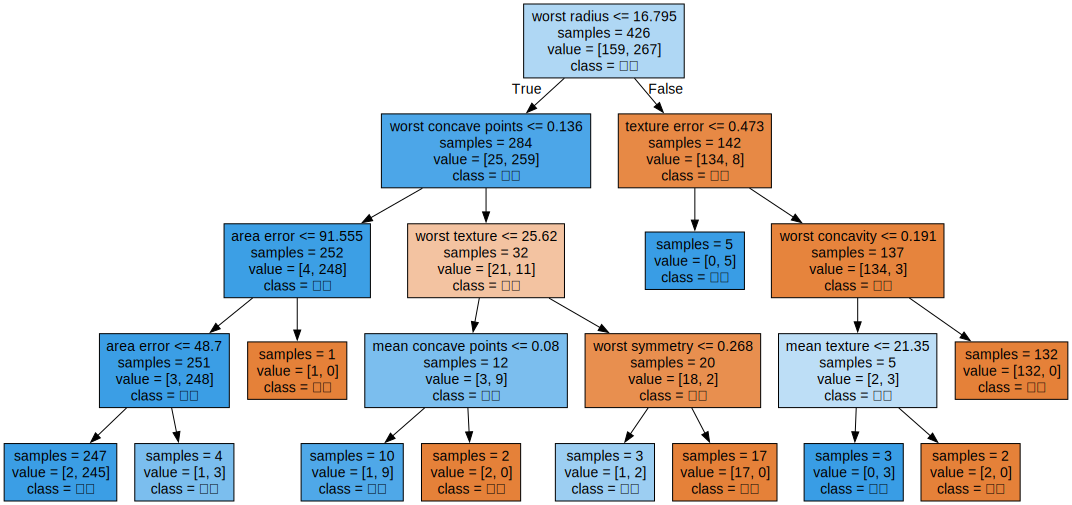

In [28]:
#graphviz로 실제 시각화
import graphviz
# 파일 못읽어내길래 encoding utf-8 설정 추가해줌 
try:
    with open("tree.dot", encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
except UnicodeDecodeError as e:
    print(f"파일을 읽는 도중 오류가 발생했습니다: {e}")

In [ ]:
# 그래프 해석 ***
# 완전 마지막 꼬리노드의 그 바로 윗노드라인을 더 중점적으로 봐야하는 부분 거기서 어떻게 파생되는지. 
# 오른쪽은 악성에서 양성으로 나올 수 있는 가능성-> 악성인줄 알았는데 양성이면 괜찮지 어차피 데이터 3개임
# 근데 양성에서 악성일 수 있는 부분 왼쪽에 있는거 samples=1 챙겨야 하고


## 특성 중요도 

In [31]:
#주요 특성 분류해내기위해 함수생성
#knn을 쓴다고 하더라도 주요 특성을 분류해내는 과정이 있으면 knn에서 분산scatter처럼 안나오게 할수있지 처음에...
#column당 얼만큼 중요한지 숫자로 나오니까 아주중요하지!! 
def plot_feat_importances(model):
     n_feat = cancer.data.shape[1] #특성전체값 데이터 열의 수 shape에서 (n1,n2) 니까 n2 즉 열을 싹다 가져온다.
     plt.barh(np.arange(n_feat), model.feature_importances_, align='center') #옆으로긴 막대그래프
     plt.yticks(np.arange(n_feat), cancer.feature_names)
     plt.xlabel("특성 중요도")
     plt.ylabel("특성")
     plt.ylim(-1, n_feat)

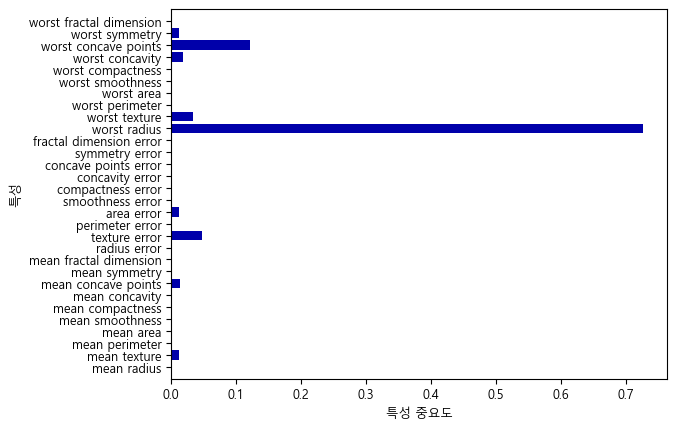

In [32]:
plot_feat_importances(tree)

## 랜덤 포레스트

- 데이터 분류 , 비선형 관계의 데이터들 처리

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
forest = RandomForestClassifier(n_estimators=100 ,random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train), forest.score(X_test, y_test))

1.0 0.958041958041958


In [46]:
from sklearn.tree import export_graphviz

#예측기 1개를 선택 estimator
#TODO: forest 전체를 볼수있게 해야됨 
estimator = forest.estimators_[3]
export_graphviz(estimator,
                out_file="forest.dot",
                class_names=["악성","양성"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

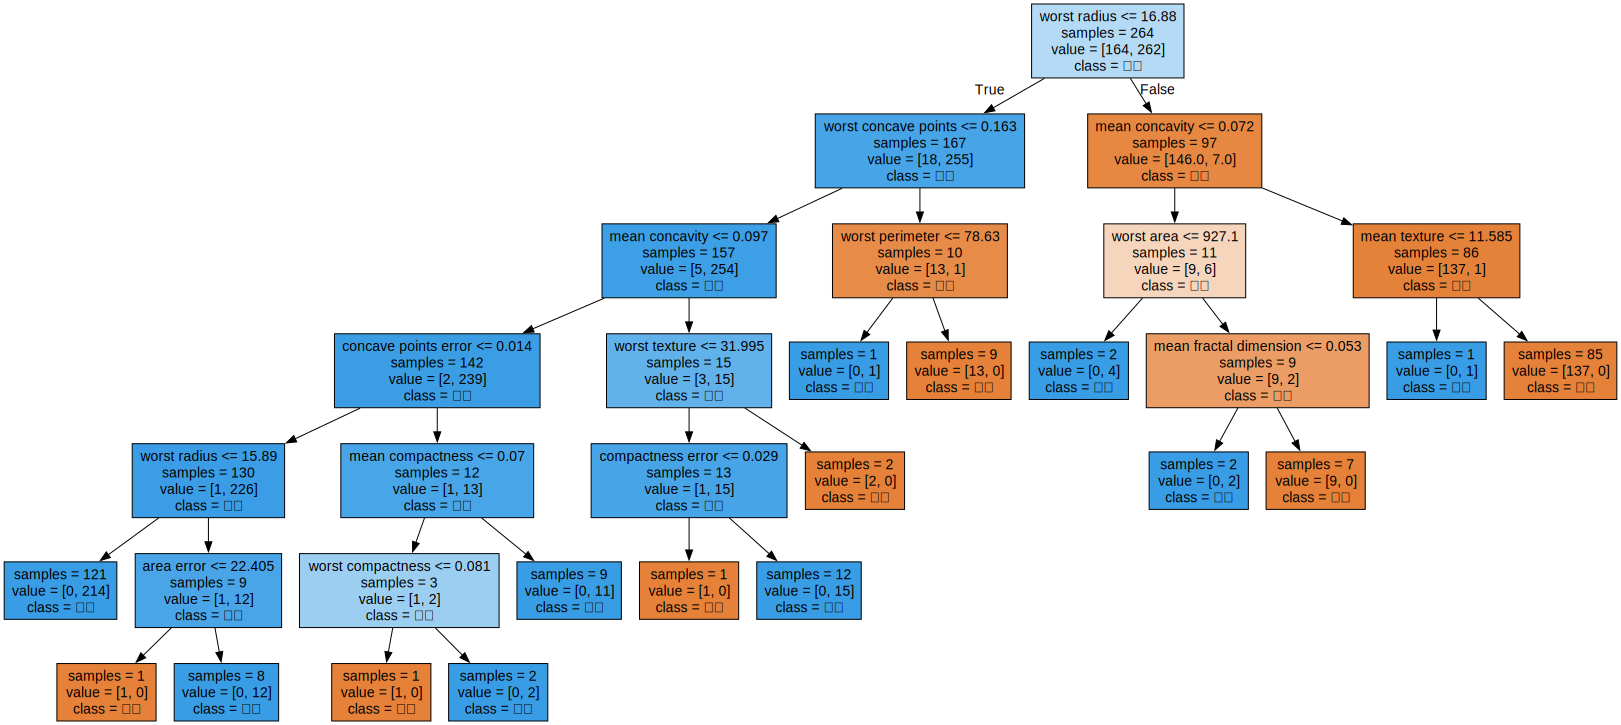

In [47]:
import graphviz
# 파일 못읽어내길래 encoding utf-8 설정 추가해줌 
try:
    with open("forest.dot", encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))
except UnicodeDecodeError as e:
    print(f"파일을 읽는 도중 오류가 발생했습니다: {e}")

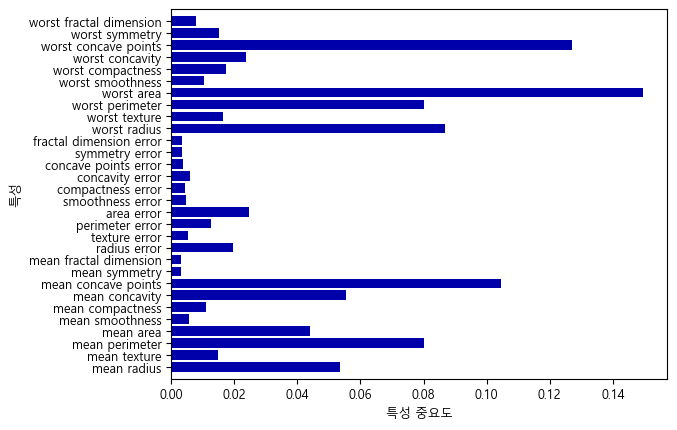

In [40]:
plot_feat_importances(forest)
#랜덤포레스트는 부트스트랩으로 트리 뽑아내기때문에, 트리가 많아질수록 과적합(오버피팅) 방지한다고 보면 됨 
# params => n_estimators=100

### 예제 p.117

In [67]:
%config InlineBackend.figure_format = 'retina'
#선명하게그려줘 제발

In [48]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


Text(0, 0.5, '가격 ($/Mbyte)')

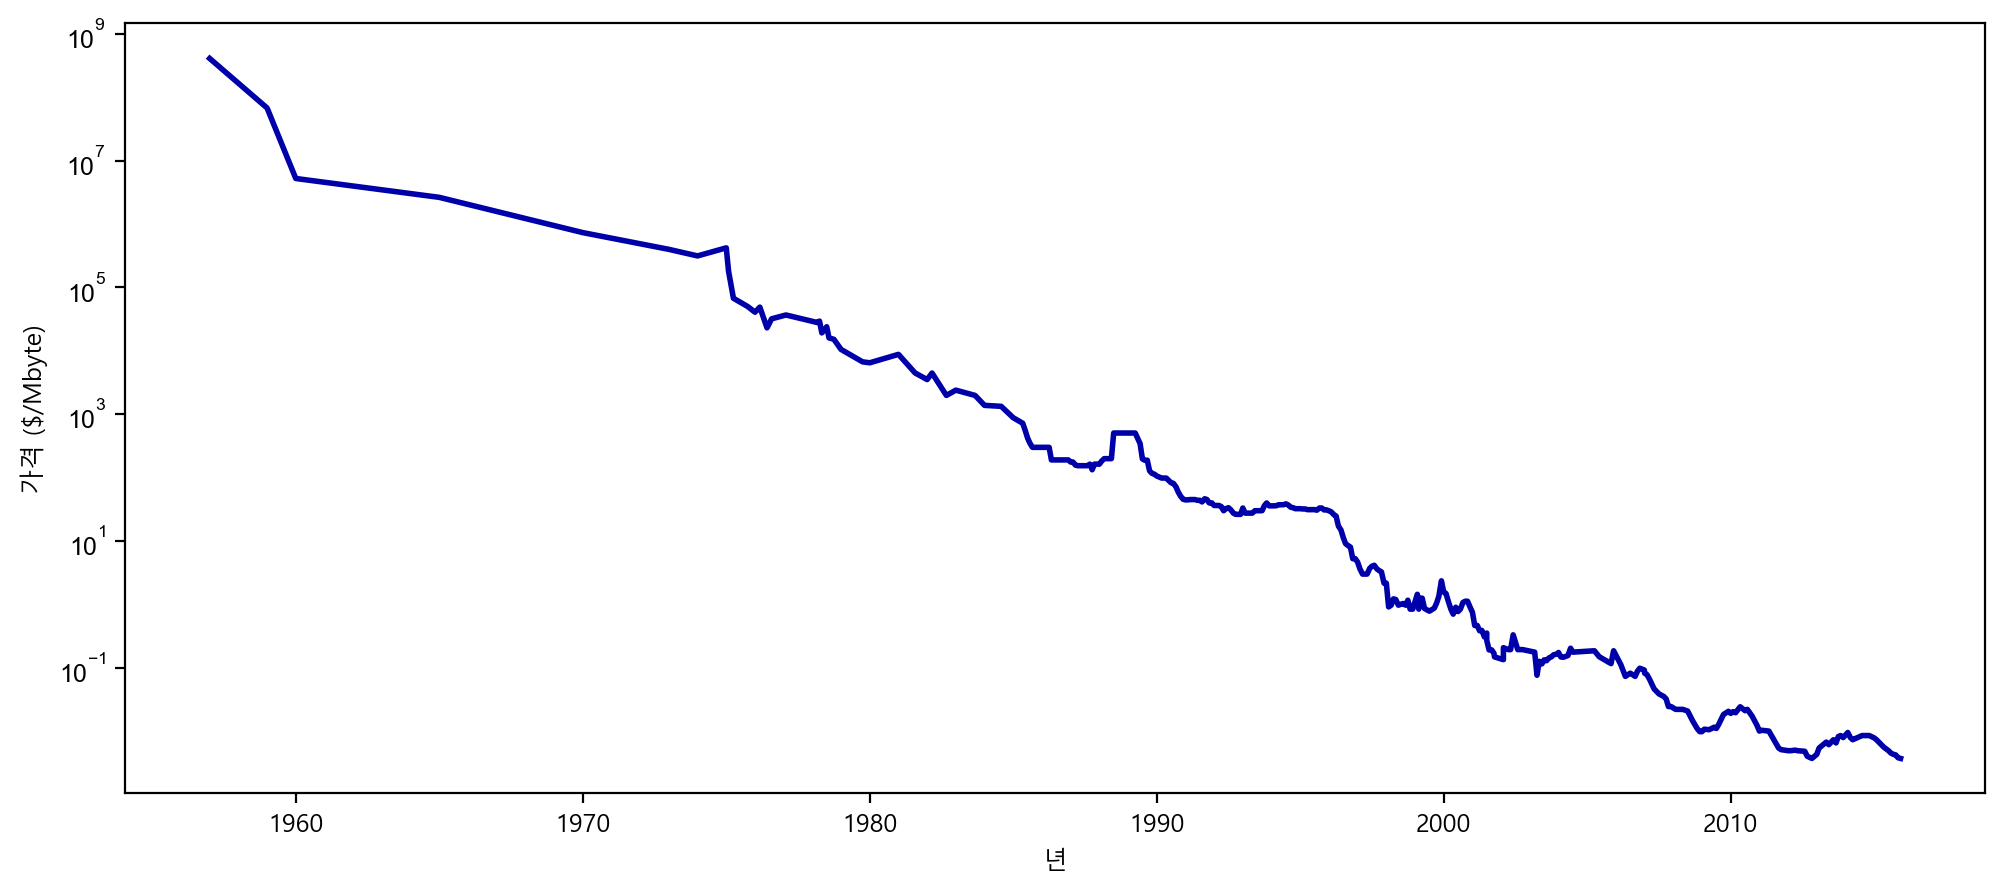

In [69]:
plt.figure(figsize=(12,5))
plt.yticks(fontname="Arial") #ticks-ax안에 격자모양 선 
plt.semilogy(ram_prices.date, ram_prices.price) #x, y 둘다 log로 변환해서 뿌릴거야 -> 원래라면 뾰족했을 데이터(곱셉)을 로그(덧셈)으로 표현하니까 그런부분이 좀 완만하게 나옴
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
#Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.은 plt.yticks(fontname = "Arial")로 해결

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 2000년 이전을 훈련, 2000년 이후를 test로 아예 잘라놓고 그안에서 나누겠음
# 랜덤포레스트는 100개를 의사결정트리 각각에 다 나누어주니까 데이터 민감도
# 그냥 의사결정트리 자체보다는 좀 떨어지는거지 그러니까 테스트 데이터의 성능이 조금더 잘나옴 아주조금
# 실제 머신러닝-추종에 대한 거. 경향성에 대한 거. 얻고자 하는건 경향성이기 때문에 데이터셋에서 특정구간 이렇게 빼면 안됨 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train=data_train.date.to_numpy()[:, np.newaxis] #모든 행 가져오고, newaxis로 뒷자리 1로 맞춰줌 -> 열이 몇갠지 모르니까 1열추가로 축 차원만든다. 넘파이로 날짜특성만 이용하기로함.
y_train=np.log(data_train.price) 

In [75]:
# 데이터 모를때 제일빠르지 두개가! 선형이랑 트리!
tree=DecisionTreeRegressor().fit(X_train, y_train) #model.fit 한번에 써서 불러오고 학습
reg=RandomForestRegressor().fit(X_train, y_train)
linear_reg=LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis] # 시계열 테스트할때.

pred_tree=tree.predict(X_all)
pred_reg=reg.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_reg=np.exp(pred_reg)
price_lr=np.exp(pred_lr)

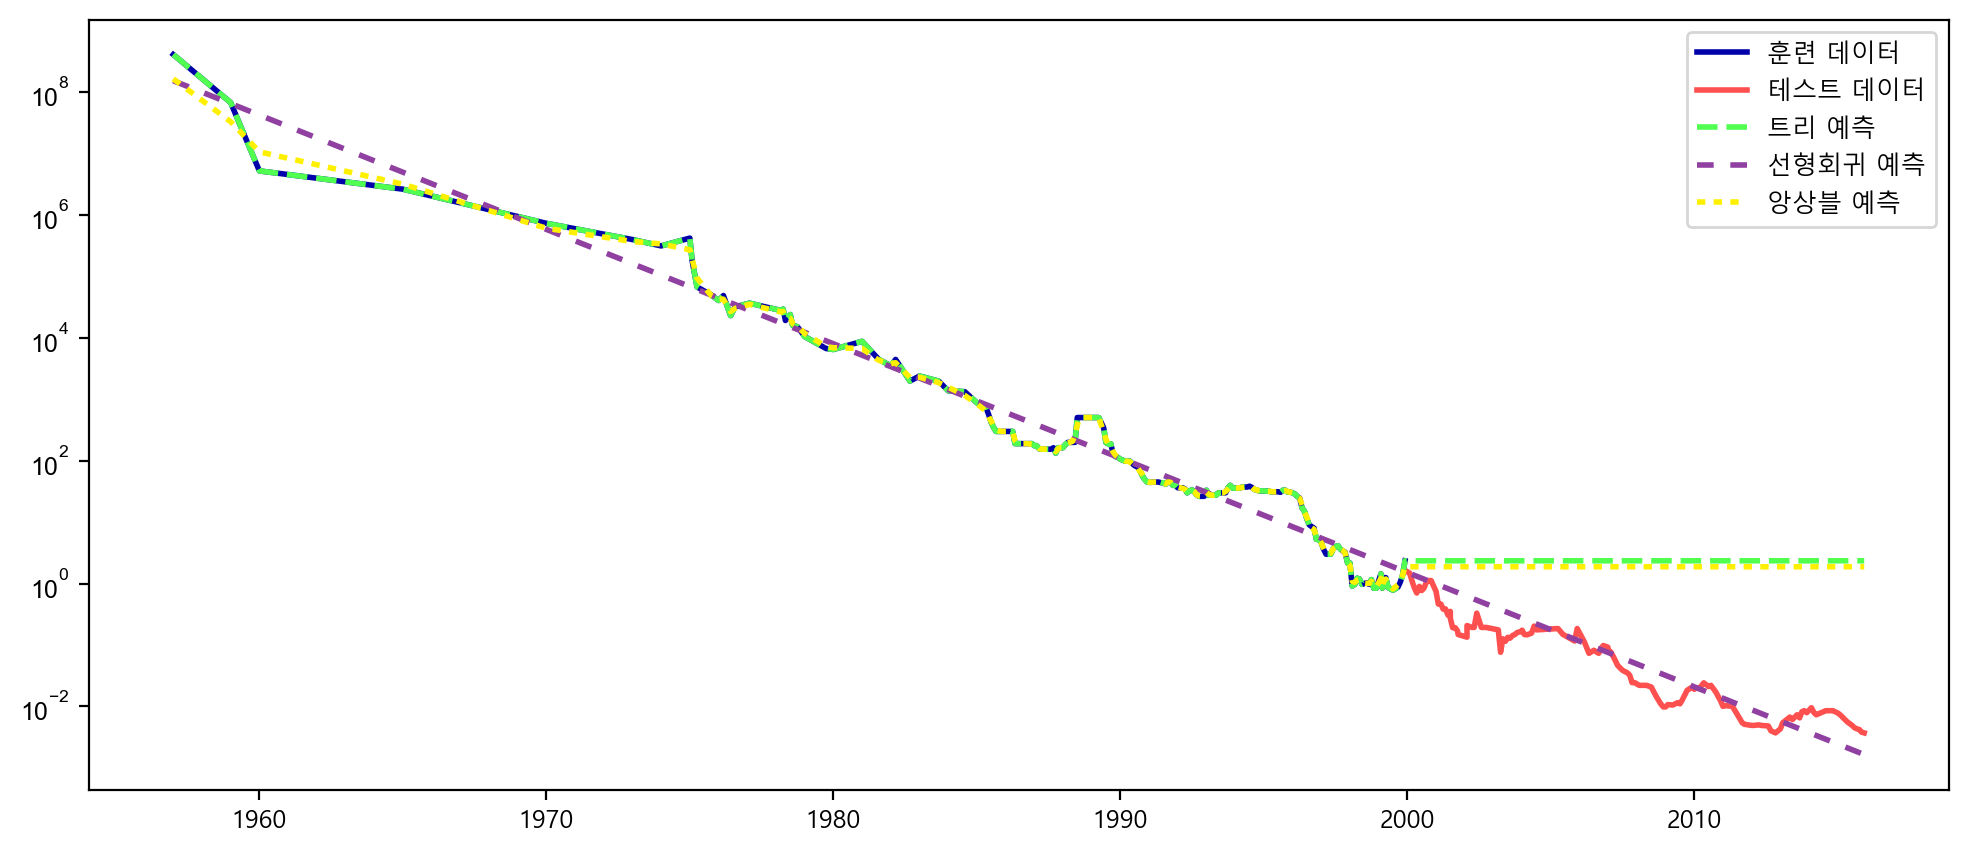

In [77]:
plt.figure(figsize=(12,5))
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_reg, label="앙상블 예측")
plt.legend()
#Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.은 plt.yticks(fontname = "Arial")로 해결